# **Face Mask Detection**
- model : VGG19(Tensorflow API)
- Paper: https://arxiv.org/abs/1409.1556



## **모델 설명**
> 참고 : \\
https://daechu.tistory.com/10 \\
https://wikidocs.net/164796 \\
https://arxiv.org/abs/1409.1556


VGG는 Visual Geometry Group의 약자입니다. 다중 레이어가 있는 CNN 아키텍쳐입니다. 16, 19는 컨볼루션 레이어의 개수를 말합니다. 아래 이미지는 VGG의 아키텍쳐 입니다.

![image](https://drive.google.com/uc?id=1qfTsmJvKi5_8MjfSAS4p8NNLSRLuu7aK)

VGG19는 19개의 레이어를 지원한다는 점을 제외하고 VGG16과 동일합니다.

## **VGGNet 종류**
여러가지 VGGNet이 있지만 이 중 가장 많이 사용하는 VGG-16인 D와 VGG-19인 E를 보시면 되겠습니다.
![image](https://drive.google.com/uc?id=1tI0XBujBLK2mHCRzaZA_2u9BIT_qopJ-)


## **VGG 아키텍쳐**
VGGNet은 CNN(Convolution Neural Network)에 기반을 둡니다. 다음 이미지는 CNN의 기본 아키텍쳐입니다. 
![imgae](https://drive.google.com/uc?id=1wQH8DEWY2YXrcennUcKu5egH7dnDyp4W)

VGG-16은 13개의 Convolution layer와 3개의  Fully Connected layer로 구성되어 있습니다.
VGG의 아키텍쳐를 간단히 살펴보겠습니다.
- Input : VGGNet은 224 x 224의 이미지가 Input됩니다.
- Convolution layer : VGG의 convolution layer은 3x3을 활용합니다. 또한 linear transformation을 해주는 1x1 convolution filter도 있습니다. 그 다음으로는 ReLU를 사용하여 다음 layer로 정보를 전달합니다. convolution stride는 해상도를 유지하기 위해 1픽셀로 고정되어 있습니다.
- Hidden layer : VGGNet의 모든 Hidden layer는 ReLU를 사용합니다.
- Fully Connected layer : VGGNet에는 3개의 Fully Connected layer가 있습니다. 세 개의 Layer 중 처음 두 레이어는 4096개의 채널이 있고 세번째 레이어는 1000개의 채널이 있습니다.

<p align="center"><img src="https://drive.google.com/uc?id=1MA_gWAPOcaV1VsWOqrSJAH6FvCgGya7p"></p>


여기서 의문점이 생깁니다. 왜 filter size를 3x3으로 고정시켜놨을까요? layer를 매우 deep하게 구성하게 된다고 했을때 filter size가 크면 input된 이미지의 크기는 매우 빠르게 줄어들 것입니다. 그러면 train하기에 애로사항이 있을것입니다. 다시말하면, layer를 깊게 쌓기 위해서 filter size를 가장 작은것을 선택했다고 생각됩니다. 논문에서는 컨볼루션 연산을 하게 되면서 파라미터의 개수가 줄어는 효과와 ReLU가 활성화 함수로 들어갈 수 있는 곳이 많아진다는 장점이 있어 사용했다고 합니다. 

## **정리**
1. VGGNet은 3x3의 작은 filter로 Conv Layer를 구성했습니다.
2. 이 필터로 인해 더 깊게 layer를 구성할 수 있었고 더 많은 ReLU 함수를 사용하여 비선형성을 확보 할 수 있었습니다.
3. VGGNet의 A~E까지 각각의 다른 모델이 아니라 학습의 단계부터 알 수 있듯이, 같은 아키텍쳐이며 layer를 더 쌓은 것입니다.

## 환경 세팅 
- kaggle dataset download : https://www.kaggle.com/general/74235

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                           title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                     COVID-19 Dataset                                     5MB  2022-11-13 15:47:17          16543        469  1.0              
devrimtuner/list-of-moststreamed-songs-on-spotify             Top 100 Spotify Songs👑🎤🎧🎼                            3KB  2022-12-30 05:42:54            843         43  1.0              
thedevastator/analyzing-credit-card-spending-habits-in-india  Credit Card Spending Habits in India               319KB  2022-12-14 07:30:37           2210         68  1.0              
die9origephit/fifa-world-cup-2022-complete-dataset            Fifa World Cu

In [ ]:
!kaggle datasets download -d andrewmvd/face-mask-detection

 99% 395M/398M [00:17<00:00, 25.7MB/s]
100% 398M/398M [00:17<00:00, 24.3MB/s]


In [ ]:
!unzip face-mask-detection.zip

In [ ]:
!kaggle datasets download -d lalitharajesh/haarcascades

 69% 1.00M/1.45M [00:00<00:00, 1.45MB/s]
100% 1.45M/1.45M [00:00<00:00, 1.93MB/s]


In [ ]:
!unzip haarcascades.zip

Archive:  haarcascades.zip
  inflating: haarcascade_eye.xml     
  inflating: haarcascade_eye_tree_eyeglasses.xml  
  inflating: haarcascade_frontalcatface.xml  
  inflating: haarcascade_frontalcatface_extended.xml  
  inflating: haarcascade_frontalface_alt.xml  
  inflating: haarcascade_frontalface_alt2.xml  
  inflating: haarcascade_frontalface_alt_tree.xml  
  inflating: haarcascade_frontalface_default.xml  
  inflating: haarcascade_fullbody.xml  
  inflating: haarcascade_lefteye_2splits.xml  
  inflating: haarcascade_licence_plate_rus_16stages.xml  
  inflating: haarcascade_lowerbody.xml  
  inflating: haarcascade_profileface.xml  
  inflating: haarcascade_righteye_2splits.xml  
  inflating: haarcascade_russian_plate_number.xml  
  inflating: haarcascade_smile.xml   
  inflating: haarcascade_upperbody.xml  


In [ ]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

100% 330M/330M [00:15<00:00, 26.0MB/s]
100% 330M/330M [00:15<00:00, 22.0MB/s]


In [ ]:
!unzip face-mask-12k-images-dataset.zip

## 라이브러리 임포트

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from collections import Counter
import cv2
import os

import keras
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
image_size = (128,128)

base_dir = './Face Mask Dataset/'


train_gen = ImageDataGenerator(horizontal_flip=True, rescale=1./255)

val_gen = ImageDataGenerator(rescale=1./255)

test_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(base_dir+'Train',target_size=image_size,seed=42)
val_ds = val_gen.flow_from_directory(base_dir+'Validation',target_size=image_size,seed=42)
test_ds = test_gen.flow_from_directory(base_dir+'Test',target_size=image_size,seed=42)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


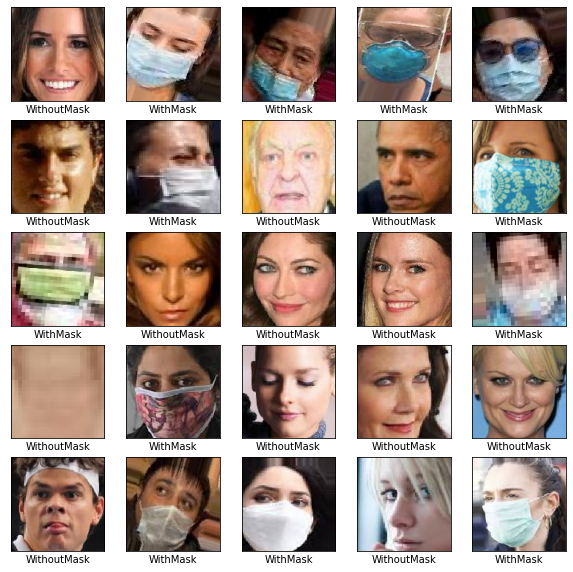

In [ ]:
class_names = {v:k for k,v in train_ds.class_indices.items()}
images,labels = next(iter(train_ds))

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[labels[i][1]])

plt.show()

# Build Model

In [ ]:
base_model = VGG19(include_top=False,input_shape=image_size+(3,))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(2,activation='sigmoid')
])

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()]
)

80134624/80134624 [==============================] - 3s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 2)                 16386     
                                                                 
Total params: 20,040,770
Trainable params: 16,386
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
# Using EarlyStopping, end training when val_accuracy is not improved for 4 consecutive times
early_stopping = keras.callbacks.EarlyStopping(monitor='val_binary_accuracy',mode='max',
                                patience=4,restore_best_weights=True)

# Using ReduceLROnPlateau, the learning rate is reduced by half when val_accuracy is not improved for 2 consecutive times
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_binary_accuracy',factor=0.5,
                                patience=2,verbose=1)

# training
history = model.fit(train_ds,batch_size=32,epochs=30,
        validation_data=val_ds,callbacks=[early_stopping,lr_scheduler])

Epoch 1/30
313/313 [==============================] - 31s 68ms/step - loss: 0.0890 - binary_accuracy: 0.9717 - val_loss: 0.0339 - val_binary_accuracy: 0.9925 - lr: 0.0010
Epoch 2/30
313/313 [==============================] - 21s 67ms/step - loss: 0.0354 - binary_accuracy: 0.9884 - val_loss: 0.0197 - val_binary_accuracy: 0.9962 - lr: 0.0010
Epoch 3/30
313/313 [==============================] - 21s 66ms/step - loss: 0.0254 - binary_accuracy: 0.9920 - val_loss: 0.0124 - val_binary_accuracy: 0.9994 - lr: 0.0010
Epoch 4/30
313/313 [==============================] - 21s 66ms/step - loss: 0.0195 - binary_accuracy: 0.9944 - val_loss: 0.0115 - val_binary_accuracy: 0.9981 - lr: 0.0010
Epoch 5/30
313/313 [==============================] - 21s 66ms/step - loss: 0.0149 - binary_accuracy: 0.9965 - val_loss: 0.0071 - val_binary_accuracy: 1.0000 - lr: 0.0010
Epoch 6/30
313/313 [==============================] - 21s 66ms/step - loss: 0.0130 - binary_accuracy: 0.9966 - val_loss: 0.0066 - val_binary_accu

In [ ]:
# test model 
model.evaluate(test_ds)

# Our model achieved 99.89% accuracy on test data.

31/31 [==============================] - 2s 62ms/step - loss: 0.0206 - binary_accuracy: 0.9914


[0.02062159776687622, 0.991431474685669]

In [ ]:
# save model
model.save('VGG19-Face Mask Detection.h5')

# Predict

In [ ]:
#loading haarcascade_frontalface_default.xml
face_model = cv2.CascadeClassifier('../input/haarcascades/haarcascade_frontalface_default.xml')
face_model

< cv2.CascadeClassifier 0x7f61bbd9a890>

In [ ]:
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")


In [ ]:
mask_label = {0:'MASK',1:'NO MASK'}
dist_label = {0:(0,255,0),1:(255,0,0)} # rectangle color

In [ ]:
def plot_image(image,subplot):
    plt.subplot(*subplot)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.show

def predict_image(image_dir):
    img = cv2.imread(image_dir)
    img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
    
    #returns a list of (x,y,w,h) tuples
    faces = face_cascade.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4)
    
    out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    plt.figure(figsize=(20,20))
    plot_image(out_img,(1,2,1))
    
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        crop = out_img[y:y+h,x:x+w]
        crop = cv2.resize(crop,(128,128))
        crop = np.reshape(crop,[1,128,128,3])/255.0
        mask_result = model.predict(crop).argmax()
        cv2.rectangle(out_img,(x,y),(x+w,y+h),dist_label[mask_result],1)
    
    plot_image(out_img,(1,2,2))

1/1 [==============================] - 0s 16ms/step


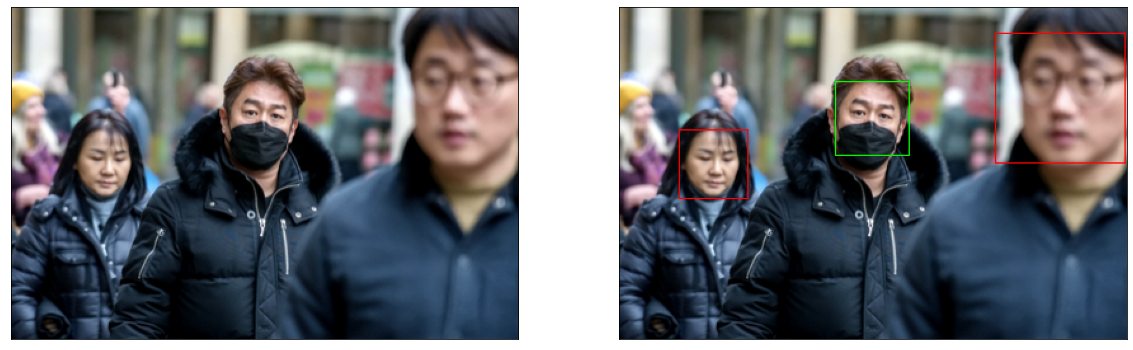

In [ ]:
predict_image('/content/kaggle/input/images/maksssksksss244.png')

1/1 [==============================] - 0s 15ms/step


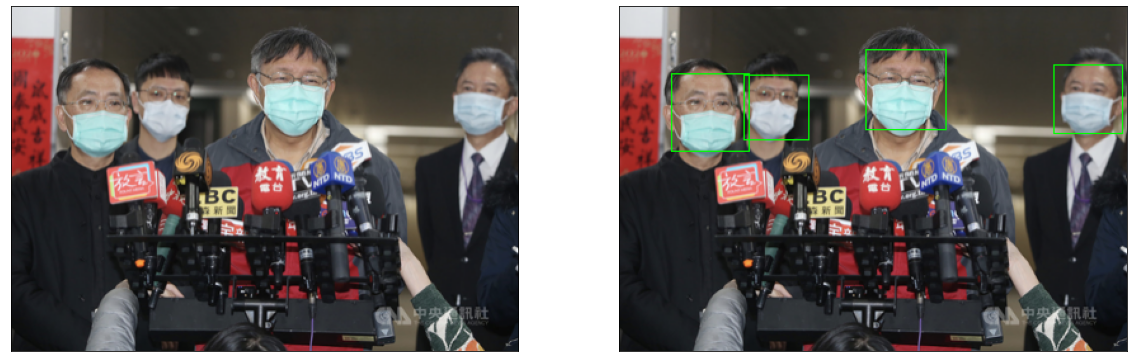

In [ ]:
predict_image('/content/kaggle/input/images/maksssksksss174.png')

1/1 [==============================] - 0s 15ms/step


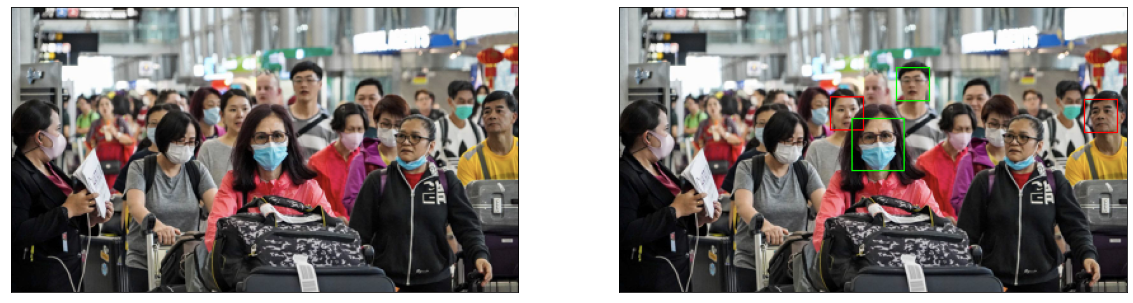

In [ ]:
predict_image('/content/kaggle/input/images/maksssksksss388.png')